# Graphs and data from the multiple runs
All the data is in the training_results directory, under the name of the run. Inside each run is multiple folders, each called run_i where i is the run number.
Inside each run is a json file with the results from the run. The json file is a dictionary with the following keys:
"train_losses",
"train_ious",
"valid_losses",
"valid_ious",
"seed".

## Imports

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import json

## Union Learning

### Load the data

In [45]:
data = []
for run in os.listdir("../training_results/union"):
    with open(f"../training_results/union/{run}/trainResults.json", "r") as f:
        data.append(json.load(f))
df = pd.DataFrame(data)
df.drop(columns=["seed"], inplace=True)
df

,train_losses,train_ious,valid_losses,valid_ious
0,"[0.7930906139011884, 0.785582959651947, 0.7845...","[0.4220726736176548, 0.5298339079323452, 0.547...","[0.7852528735995292, 0.7836280837655067, 0.783...","[0.5412983767114673, 0.5474815170577071, 0.560..."
1,"[0.7941759628441567, 0.7856500588339667, 0.784...","[0.41101493335560013, 0.5299287357669951, 0.54...","[0.7844348013401031, 0.7852870211005211, 0.783...","[0.544687229253926, 0.5599143051322558, 0.5799..."
2,"[0.7917396461764498, 0.7854799325255619, 0.784...","[0.4365036012868096, 0.5359644032770562, 0.547...","[0.7850654363632202, 0.7837071388959884, 0.783...","[0.52753978429875, 0.5728828499270628, 0.58055..."
3,"[0.7907460174014289, 0.7853421571715635, 0.784...","[0.45764460223963294, 0.5399164775231573, 0.54...","[0.7843308746814728, 0.7859720185399055, 0.783...","[0.5537216973804976, 0.516358850462608, 0.5629..."
4,"[0.7924135290352997, 0.7853504526017674, 0.784...","[0.42975489222599106, 0.5348779566258092, 0.54...","[0.7845575928688049, 0.7838279977440834, 0.784...","[0.5606342675073936, 0.5266741344282567, 0.574..."


## Plot the data
Boxchart with the last value of the training and validation losses and ious using sns

In [46]:
sns.set_theme(style="whitegrid")
sns.set_context("paper", font_scale=1.5)
sns.set_style("whitegrid")
sns.set_palette("colorblind")

### Losses

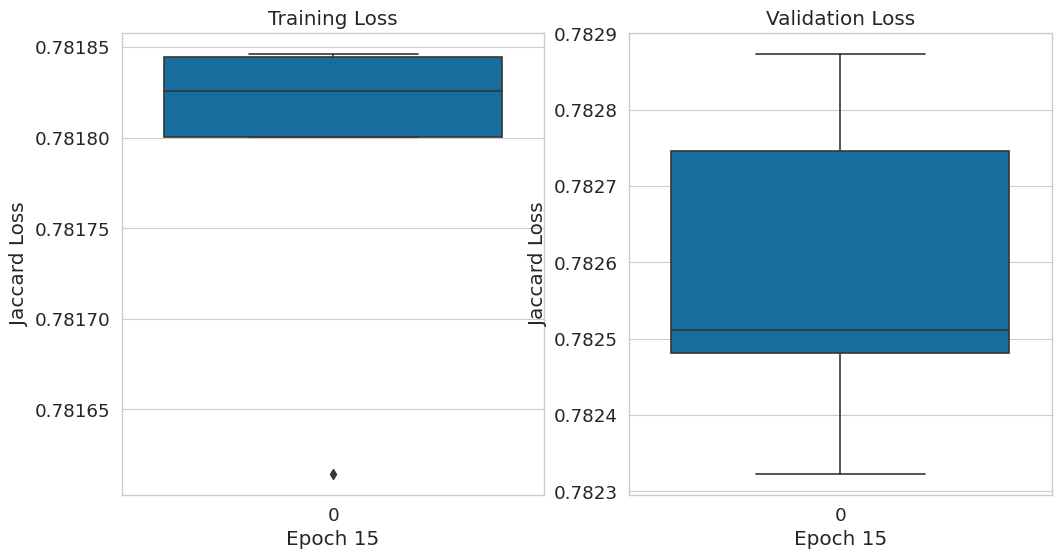

In [47]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
sns.boxplot(data=df["train_losses"].apply(lambda x: x[-1]), ax=ax[0])
sns.boxplot(data=df["valid_losses"].apply(lambda x: x[-1]), ax=ax[1])
ax[0].set_title("Training Loss")
ax[1].set_title("Validation Loss")
# Set axis label to final value
ax[0].set(xlabel="Epoch 15")
ax[1].set(xlabel="Epoch 15")
ax[0].set(ylabel="Jaccard Loss")
ax[1].set(ylabel="Jaccard Loss")
plt.show()

### IOUs

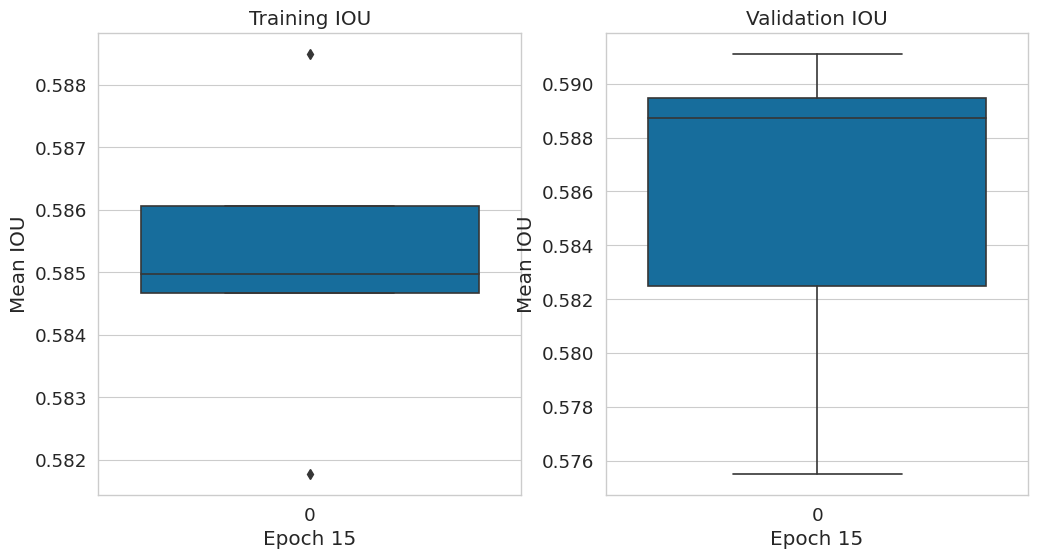

In [48]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
sns.boxplot(data=df["train_ious"].apply(lambda x: x[-1]), ax=ax[0])
sns.boxplot(data=df["valid_ious"].apply(lambda x: x[-1]), ax=ax[1])
ax[0].set_title("Training IOU")
ax[1].set_title("Validation IOU")
# Set axis label to final value
ax[0].set(xlabel="Epoch 15")
ax[1].set(xlabel="Epoch 15")
ax[0].set(ylabel="Mean IOU")
ax[1].set(ylabel="Mean IOU")
plt.show()

### Lineplots of the losses and ious
The 5 runs are plotted in the same graph, lightly transparent with an average non-transparent line. The average line is the mean of the 5 runs.
One can see that the average line is a good approximation of the 5 runs.

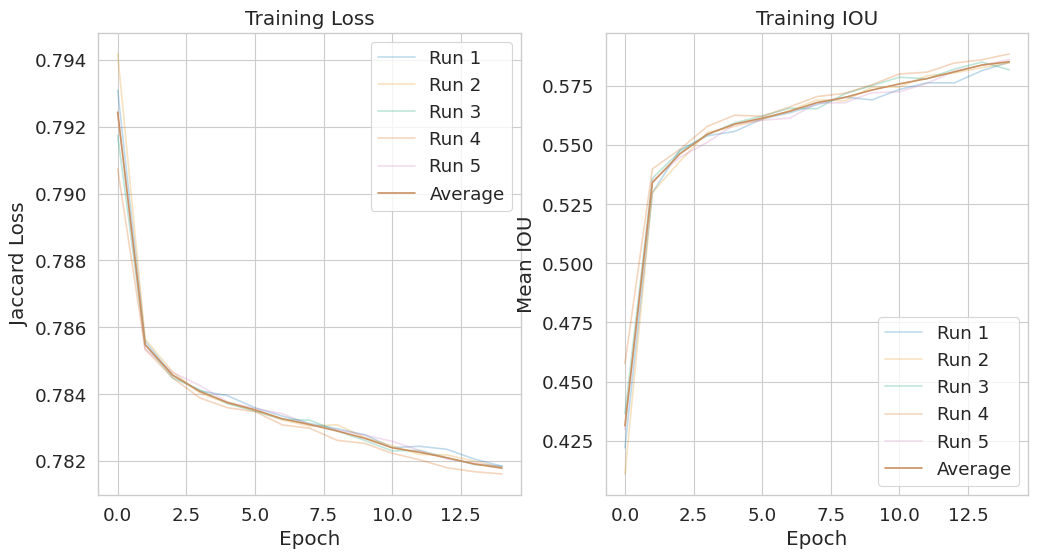

In [49]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
for i in range(5):
    ax[0].plot(df["train_losses"][i], alpha=0.25)
    ax[1].plot(df["train_ious"][i], alpha=0.25)
ax[0].plot(np.mean(df["train_losses"].tolist(), axis=0), alpha=1)
ax[1].plot(np.mean(df["train_ious"].tolist(), axis=0), alpha=1)
ax[0].set_title("Training Loss")
ax[1].set_title("Training IOU")
ax[0].set(xlabel="Epoch")
ax[1].set(xlabel="Epoch")
ax[0].set(ylabel="Jaccard Loss")
ax[1].set(ylabel="Mean IOU")
# Create legend
ax[0].legend(["Run 1", "Run 2", "Run 3", "Run 4", "Run 5", "Average"])
ax[1].legend(["Run 1", "Run 2", "Run 3", "Run 4", "Run 5", "Average"])
plt.show()

### Validation losses and ious

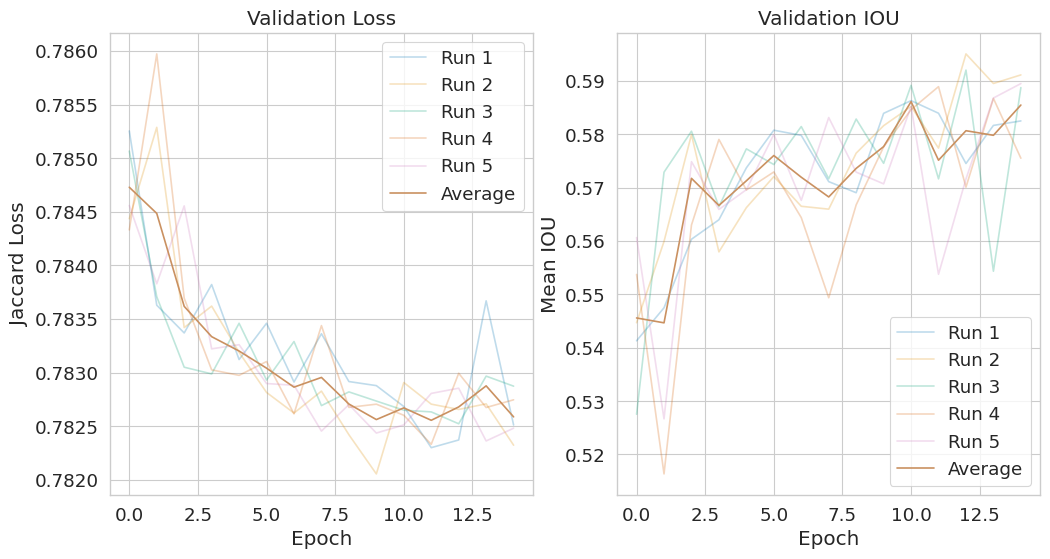

In [50]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
for i in range(5):
    ax[0].plot(df["valid_losses"][i], alpha=0.25)
    ax[1].plot(df["valid_ious"][i], alpha=0.25)
ax[0].plot(np.mean(df["valid_losses"].tolist(), axis=0), alpha=1)
ax[1].plot(np.mean(df["valid_ious"].tolist(), axis=0), alpha=1)
ax[0].set_title("Validation Loss")
ax[1].set_title("Validation IOU")
ax[0].set(xlabel="Epoch")
ax[1].set(xlabel="Epoch")
ax[0].set(ylabel="Jaccard Loss")
ax[1].set(ylabel="Mean IOU")
ax[0].legend(["Run 1", "Run 2", "Run 3", "Run 4", "Run 5", "Average"])
ax[1].legend(["Run 1", "Run 2", "Run 3", "Run 4", "Run 5", "Average"])
plt.show()

## Curriculum Learning
Same graphs as above, but for the curriculum learning


## Load the data

In [51]:
data = []
for run in os.listdir("../training_results/curriculum"):
    with open(f"../training_results/curriculum/{run}/trainResults.json", "r") as f:
        data.append(json.load(f))
curr_df = pd.DataFrame(data)
curr_df.drop(columns=["seed"], inplace=True)
curr_df

,train_losses,train_ious,valid_losses,valid_ious
0,"[0.8020903045131315, 0.786092508223749, 0.7841...","[0.38520400921775816, 0.5190408108312256, 0.55...","[0.7943435862660408, 0.785609370470047, 0.7845...","[0.4702086606962557, 0.5194484910102667, 0.554..."
1,"[0.8069196785649946, 0.7867703168622909, 0.784...","[0.3545149559609478, 0.4879359435481423, 0.539...","[0.7943616405129432, 0.7856865048408508, 0.785...","[0.44190971760672787, 0.5115011104308399, 0.53..."
2,"[0.8020824655409782, 0.7862818567983566, 0.784...","[0.38372910522761106, 0.5237268829088509, 0.56...","[0.7907834306359292, 0.7852151691913605, 0.784...","[0.4851751027054469, 0.5451257920123228, 0.543..."
3,"[0.8079881206635506, 0.7875251635428397, 0.785...","[0.35359188916133144, 0.47316444810838515, 0.5...","[0.7959090411663056, 0.7862218722701073, 0.785...","[0.4407918930419212, 0.4921574658724686, 0.525..."
4,"[0.8093261391885819, 0.7881461824140241, 0.785...","[0.3543022043595036, 0.4272256850828126, 0.435...","[0.8008078470826149, 0.7865855783224106, 0.785...","[0.4316654899088442, 0.4279670156293837, 0.442..."


In [52]:
sns.set_theme(style="whitegrid")
sns.set_context("paper", font_scale=1.5)
sns.set_style("whitegrid")
sns.set_palette("colorblind")

## Boxplot

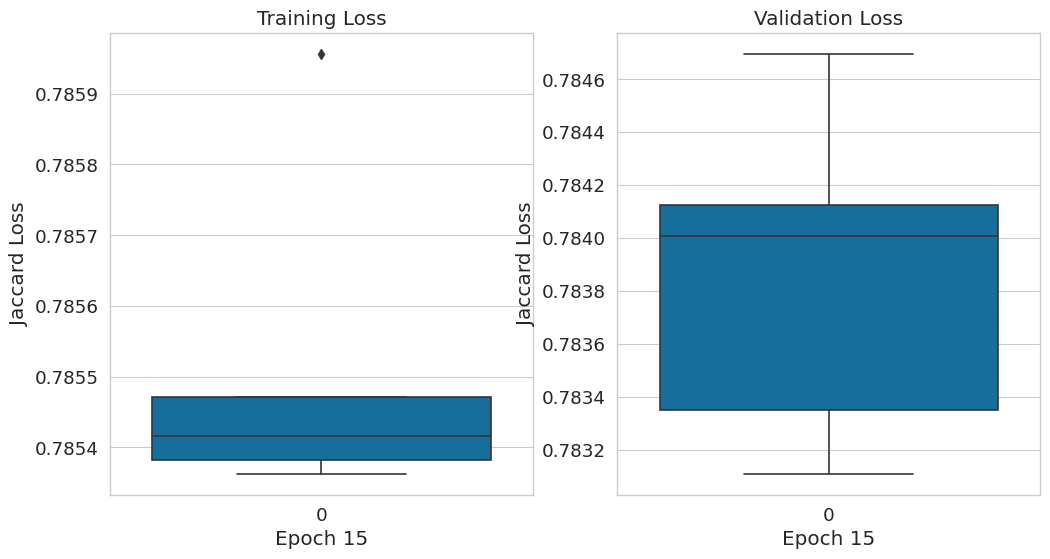

In [53]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
sns.boxplot(data=curr_df["train_losses"].apply(lambda x: x[-1]), ax=ax[0])
sns.boxplot(data=curr_df["valid_losses"].apply(lambda x: x[-1]), ax=ax[1])
ax[0].set_title("Training Loss")
ax[1].set_title("Validation Loss")
# Set axis label to final value
ax[0].set(xlabel="Epoch 15")
ax[1].set(xlabel="Epoch 15")
ax[0].set(ylabel="Jaccard Loss")
ax[1].set(ylabel="Jaccard Loss")
plt.show()


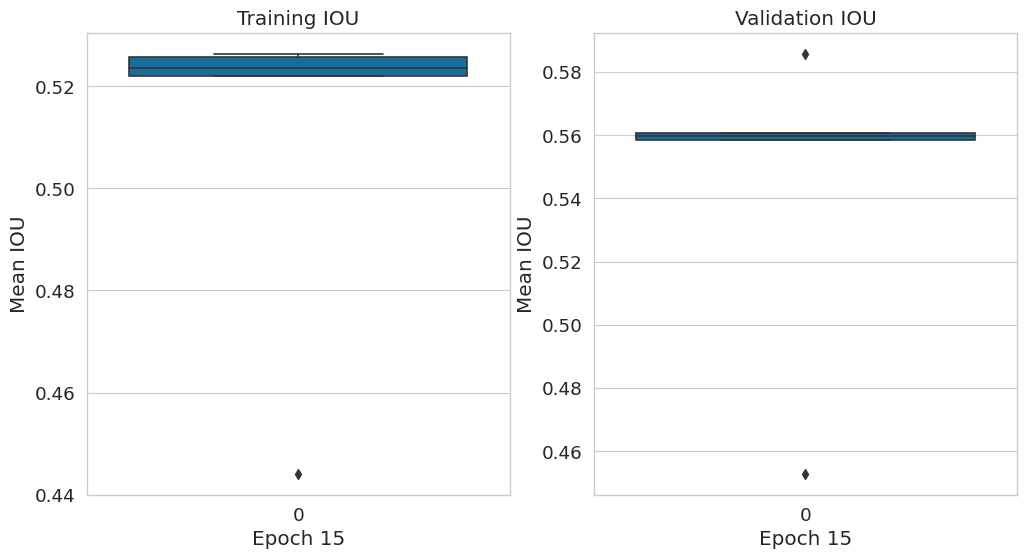

In [54]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
sns.boxplot(data=curr_df["train_ious"].apply(lambda x: x[-1]), ax=ax[0])
sns.boxplot(data=curr_df["valid_ious"].apply(lambda x: x[-1]), ax=ax[1])
ax[0].set_title("Training IOU")
ax[1].set_title("Validation IOU")
# Set axis label to final value
ax[0].set(xlabel="Epoch 15")
ax[1].set(xlabel="Epoch 15")
ax[0].set(ylabel="Mean IOU")
ax[1].set(ylabel="Mean IOU")
plt.show()

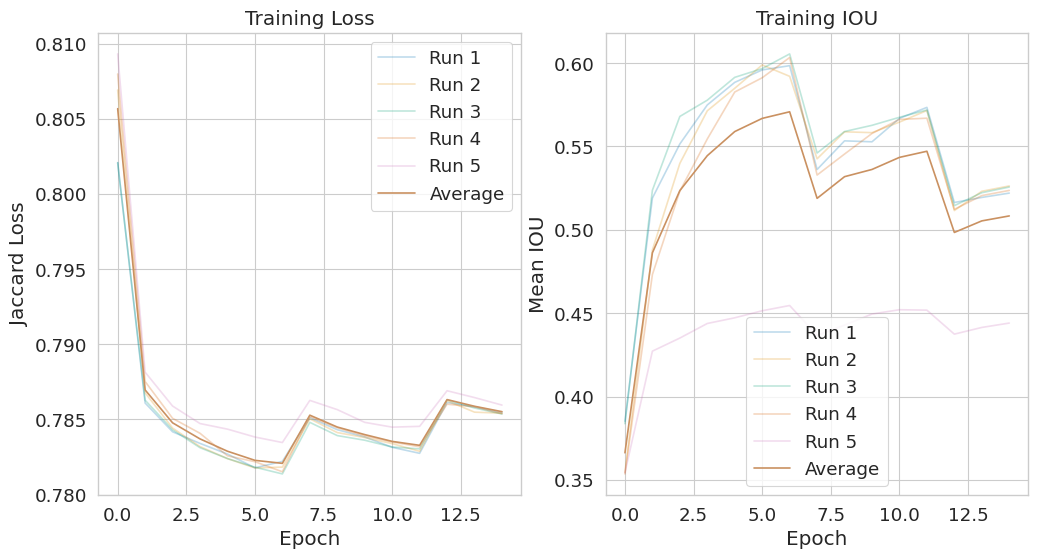

In [55]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
for i in range(5):
    ax[0].plot(curr_df["train_losses"][i], alpha=0.25)
    ax[1].plot(curr_df["train_ious"][i], alpha=0.25)
ax[0].plot(np.mean(curr_df["train_losses"].tolist(), axis=0), alpha=1)
ax[1].plot(np.mean(curr_df["train_ious"].tolist(), axis=0), alpha=1)
ax[0].set_title("Training Loss")
ax[1].set_title("Training IOU")
ax[0].set(xlabel="Epoch")
ax[1].set(xlabel="Epoch")
ax[0].set(ylabel="Jaccard Loss")
ax[1].set(ylabel="Mean IOU")
ax[0].legend(["Run 1", "Run 2", "Run 3", "Run 4", "Run 5", "Average"])
ax[1].legend(["Run 1", "Run 2", "Run 3", "Run 4", "Run 5", "Average"])
plt.show()

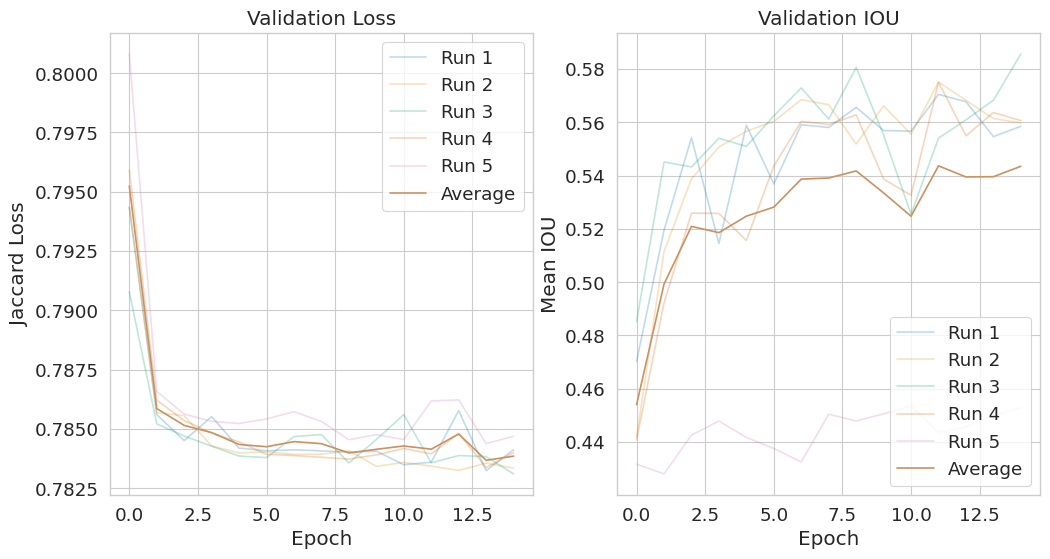

In [56]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
for i in range(5):
    ax[0].plot(curr_df["valid_losses"][i], alpha=0.25)
    ax[1].plot(curr_df["valid_ious"][i], alpha=0.25)
ax[0].plot(np.mean(curr_df["valid_losses"].tolist(), axis=0), alpha=1)
ax[1].plot(np.mean(curr_df["valid_ious"].tolist(), axis=0), alpha=1)
ax[0].set_title("Validation Loss")
ax[1].set_title("Validation IOU")
ax[0].set(xlabel="Epoch")
ax[1].set(xlabel="Epoch")
ax[0].set(ylabel="Jaccard Loss")
ax[1].set(ylabel="Mean IOU")
ax[0].legend(["Run 1", "Run 2", "Run 3", "Run 4", "Run 5", "Average"])
ax[1].legend(["Run 1", "Run 2", "Run 3", "Run 4", "Run 5", "Average"])
plt.show()

## Union and Curriculum next to each other

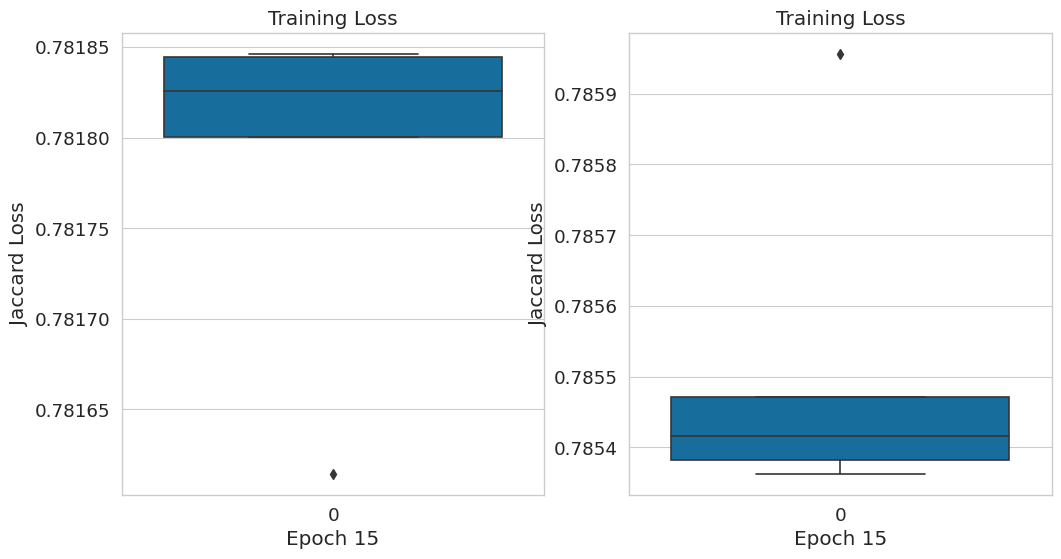

In [57]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
sns.boxplot(data=df["train_losses"].apply(lambda x: x[-1]), ax=ax[0])
sns.boxplot(data=curr_df["train_losses"].apply(lambda x: x[-1]), ax=ax[1])
ax[0].set_title("Training Loss")
ax[1].set_title("Training Loss")
ax[0].set(xlabel="Epoch 15")
ax[1].set(xlabel="Epoch 15")
ax[0].set(ylabel="Jaccard Loss")
ax[1].set(ylabel="Jaccard Loss")
plt.show()

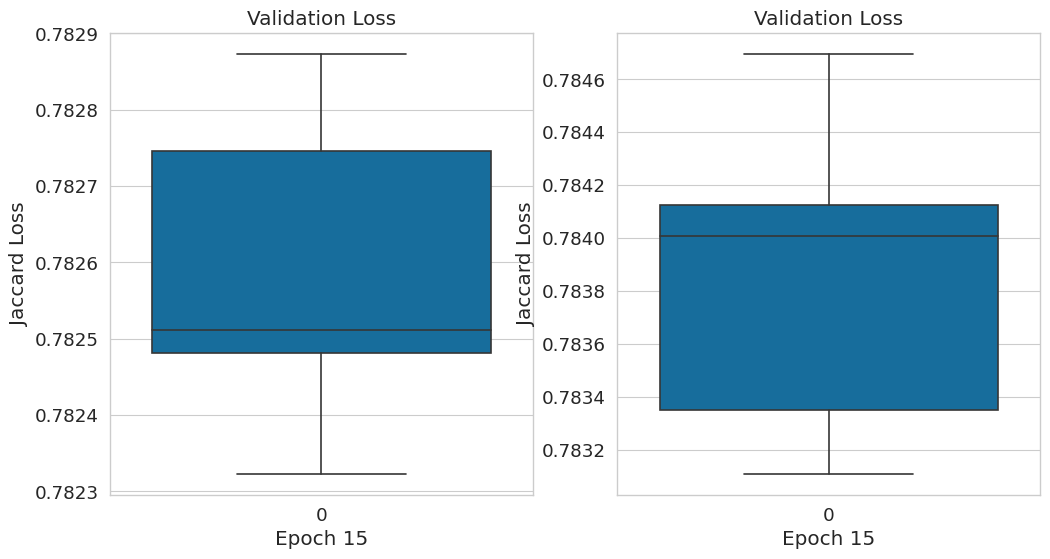

In [58]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
sns.boxplot(data=df["valid_losses"].apply(lambda x: x[-1]), ax=ax[0])
sns.boxplot(data=curr_df["valid_losses"].apply(lambda x: x[-1]), ax=ax[1])
ax[0].set_title("Validation Loss")
ax[1].set_title("Validation Loss")
ax[0].set(xlabel="Epoch 15")
ax[1].set(xlabel="Epoch 15")
ax[0].set(ylabel="Jaccard Loss")
ax[1].set(ylabel="Jaccard Loss")
plt.show()

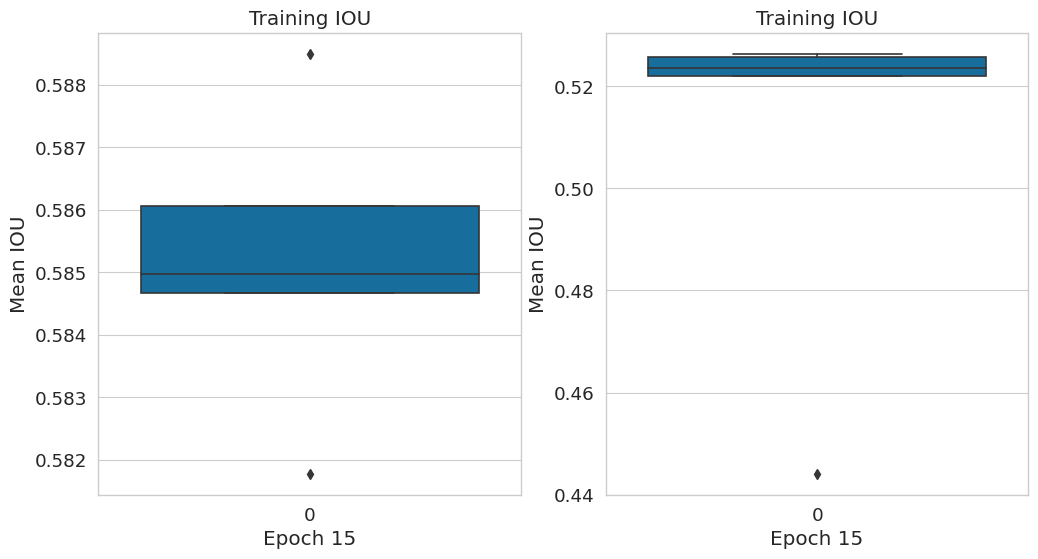

In [59]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
sns.boxplot(data=df["train_ious"].apply(lambda x: x[-1]), ax=ax[0])
sns.boxplot(data=curr_df["train_ious"].apply(lambda x: x[-1]), ax=ax[1])
ax[0].set_title("Training IOU")
ax[1].set_title("Training IOU")
ax[0].set(xlabel="Epoch 15")
ax[1].set(xlabel="Epoch 15")
ax[0].set(ylabel="Mean IOU")
ax[1].set(ylabel="Mean IOU")
plt.show()

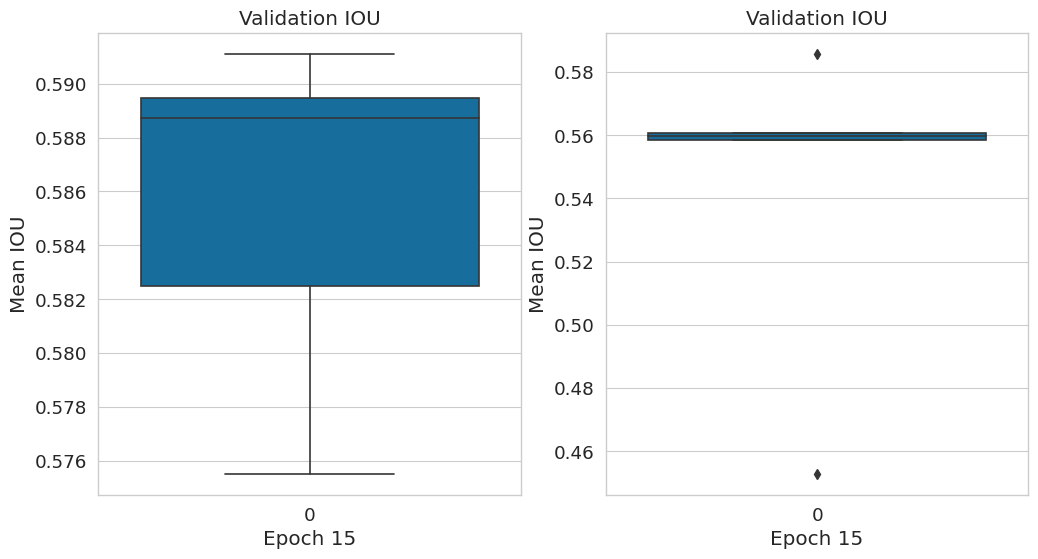

In [60]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
sns.boxplot(data=df["valid_ious"].apply(lambda x: x[-1]), ax=ax[0])
sns.boxplot(data=curr_df["valid_ious"].apply(lambda x: x[-1]), ax=ax[1])
ax[0].set_title("Validation IOU")
ax[1].set_title("Validation IOU")
ax[0].set(xlabel="Epoch 15")
ax[1].set(xlabel="Epoch 15")
ax[0].set(ylabel="Mean IOU")
ax[1].set(ylabel="Mean IOU")
plt.show()

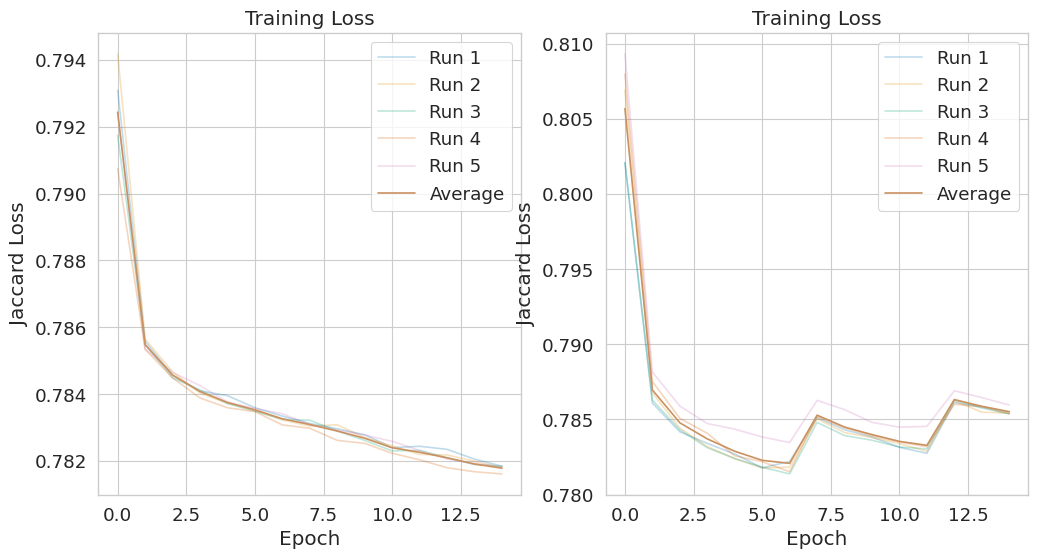

In [61]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
for i in range(5):
    ax[0].plot(df["train_losses"][i], alpha=0.25)
    ax[1].plot(curr_df["train_losses"][i], alpha=0.25)
ax[0].plot(np.mean(df["train_losses"].tolist(), axis=0), alpha=1)
ax[1].plot(np.mean(curr_df["train_losses"].tolist(), axis=0), alpha=1)
ax[0].set_title("Training Loss")
ax[1].set_title("Training Loss")
ax[0].set(xlabel="Epoch")
ax[1].set(xlabel="Epoch")
ax[0].set(ylabel="Jaccard Loss")
ax[1].set(ylabel="Jaccard Loss")
ax[0].legend(["Run 1", "Run 2", "Run 3", "Run 4", "Run 5", "Average"])
ax[1].legend(["Run 1", "Run 2", "Run 3", "Run 4", "Run 5", "Average"])
plt.show()

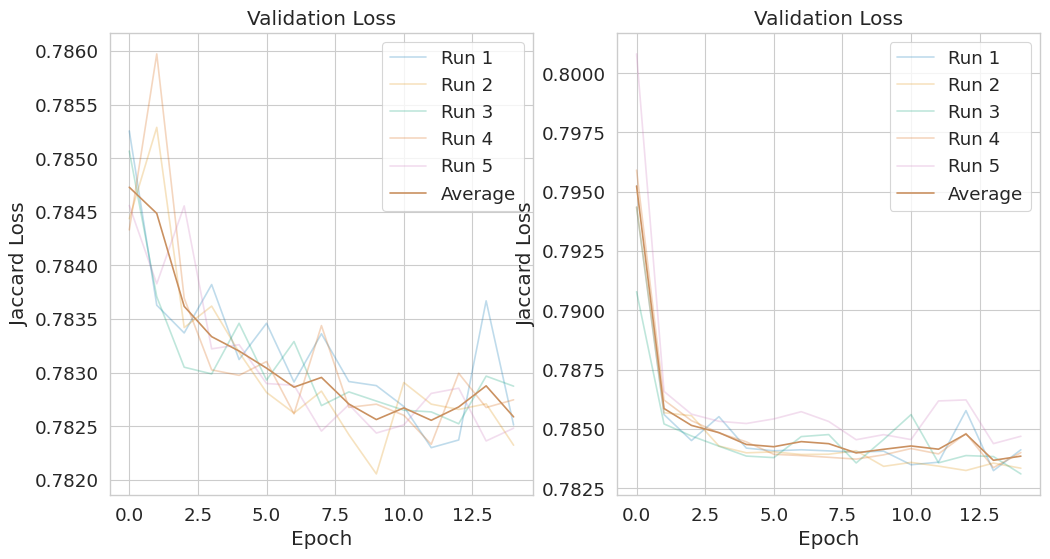

In [62]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
for i in range(5):
    ax[0].plot(df["valid_losses"][i], alpha=0.25)
    ax[1].plot(curr_df["valid_losses"][i], alpha=0.25)
ax[0].plot(np.mean(df["valid_losses"].tolist(), axis=0), alpha=1)
ax[1].plot(np.mean(curr_df["valid_losses"].tolist(), axis=0), alpha=1)
ax[0].set_title("Validation Loss")
ax[1].set_title("Validation Loss")
ax[0].set(xlabel="Epoch")
ax[1].set(xlabel="Epoch")
ax[0].set(ylabel="Jaccard Loss")
ax[1].set(ylabel="Jaccard Loss")
ax[0].legend(["Run 1", "Run 2", "Run 3", "Run 4", "Run 5", "Average"])
ax[1].legend(["Run 1", "Run 2", "Run 3", "Run 4", "Run 5", "Average"])
plt.show()

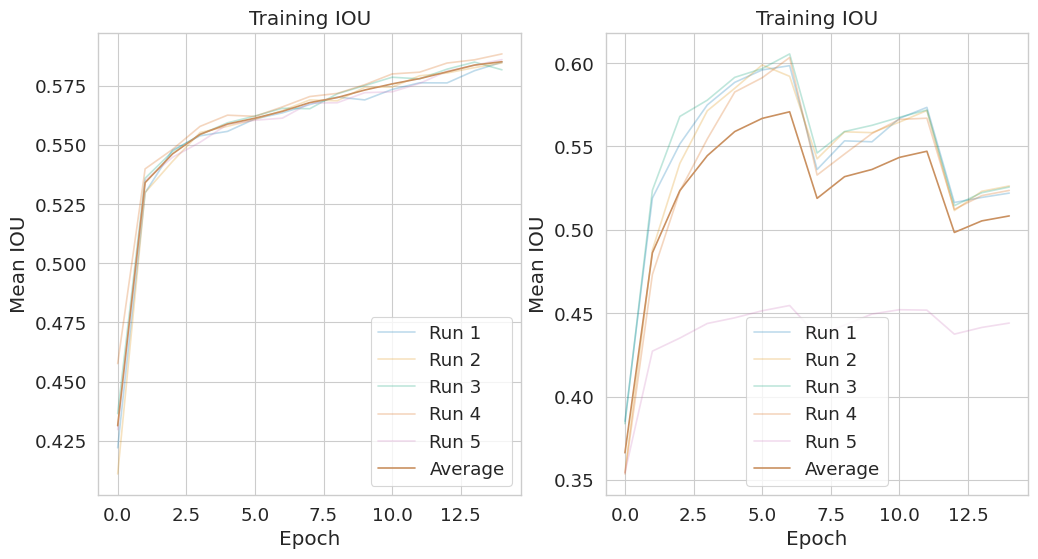

In [63]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
for i in range(5):
    ax[0].plot(df["train_ious"][i], alpha=0.25)
    ax[1].plot(curr_df["train_ious"][i], alpha=0.25)
ax[0].plot(np.mean(df["train_ious"].tolist(), axis=0), alpha=1)
ax[1].plot(np.mean(curr_df["train_ious"].tolist(), axis=0), alpha=1)
ax[0].set_title("Training IOU")
ax[1].set_title("Training IOU")
ax[0].set(xlabel="Epoch")
ax[1].set(xlabel="Epoch")
ax[0].set(ylabel="Mean IOU")
ax[1].set(ylabel="Mean IOU")
ax[0].legend(["Run 1", "Run 2", "Run 3", "Run 4", "Run 5", "Average"])
ax[1].legend(["Run 1", "Run 2", "Run 3", "Run 4", "Run 5", "Average"])
plt.show()


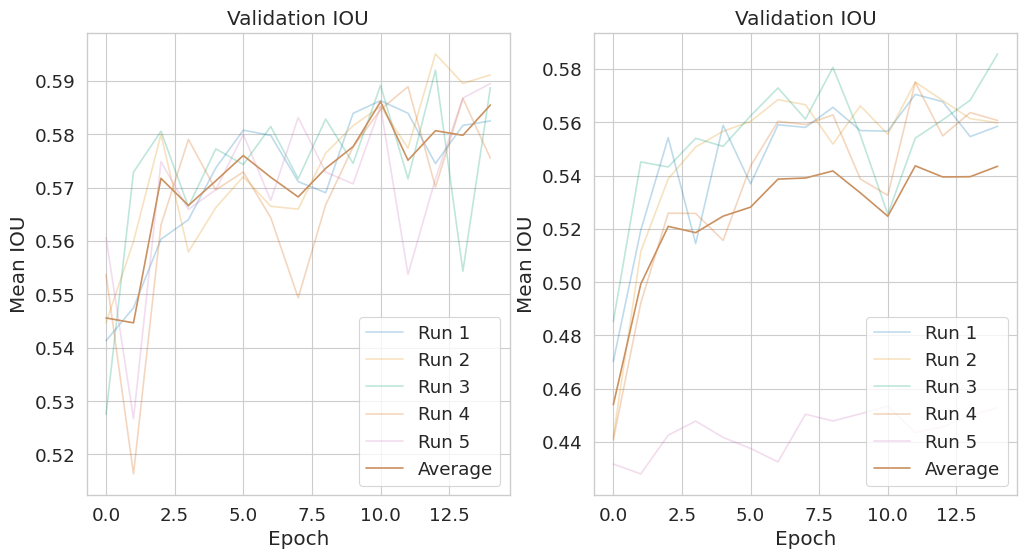

In [64]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
for i in range(5):
    ax[0].plot(df["valid_ious"][i], alpha=0.25)
    ax[1].plot(curr_df["valid_ious"][i], alpha=0.25)
ax[0].plot(np.mean(df["valid_ious"].tolist(), axis=0), alpha=1)
ax[1].plot(np.mean(curr_df["valid_ious"].tolist(), axis=0), alpha=1)
ax[0].set_title("Validation IOU")
ax[1].set_title("Validation IOU")
ax[0].set(xlabel="Epoch")
ax[1].set(xlabel="Epoch")
ax[0].set(ylabel="Mean IOU")
ax[1].set(ylabel="Mean IOU")
ax[0].legend(["Run 1", "Run 2", "Run 3", "Run 4", "Run 5", "Average"])
ax[1].legend(["Run 1", "Run 2", "Run 3", "Run 4", "Run 5", "Average"])
plt.show()


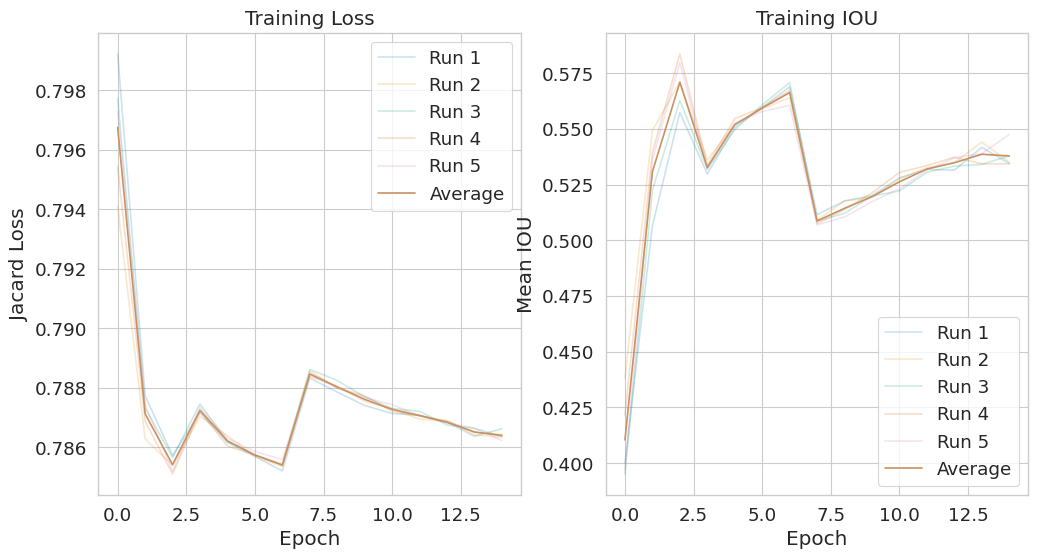

In [71]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
for i in range(5):
    ax[0].plot(curr_df["train_losses"][i], alpha=0.2)
    ax[1].plot(curr_df["train_ious"][i], alpha=0.2)
ax[0].plot(np.mean(curr_df["train_losses"].tolist(), axis=0), alpha=1)
ax[1].plot(np.mean(curr_df["train_ious"].tolist(), axis=0), alpha=1)
ax[0].set_title("Training Loss")
ax[1].set_title("Training IOU")
ax[0].set(xlabel="Epoch")
ax[1].set(xlabel="Epoch")
ax[0].set(ylabel="Jaccard Loss")
ax[1].set(ylabel="Mean IOU")
ax[0].legend(["Run 1", "Run 2", "Run 3", "Run 4", "Run 5", "Average"])
ax[1].legend(["Run 1", "Run 2", "Run 3", "Run 4", "Run 5", "Average"])
plt.show()

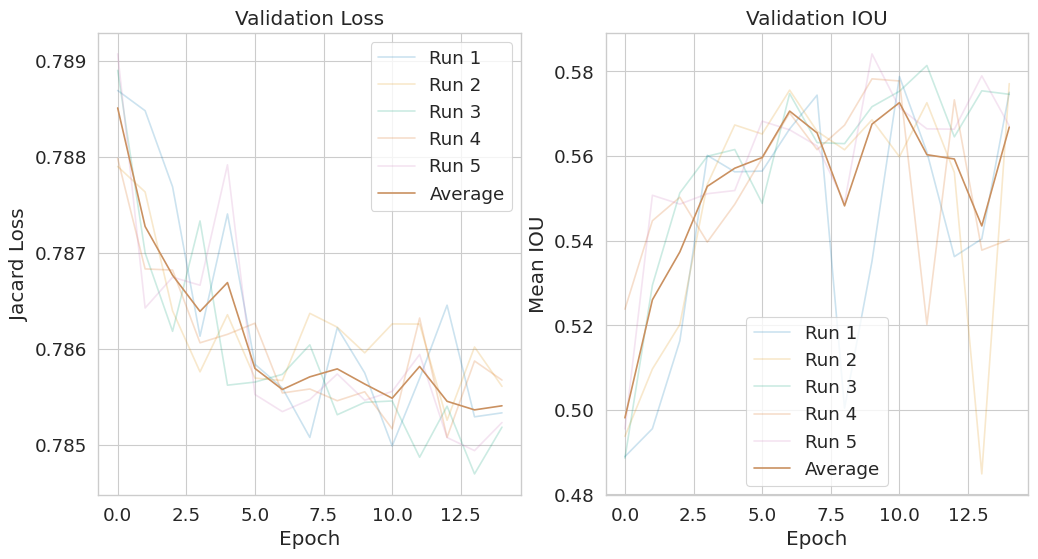

In [72]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
for i in range(5):
    ax[0].plot(curr_df["valid_losses"][i], alpha=0.2)
    ax[1].plot(curr_df["valid_ious"][i], alpha=0.2)
ax[0].plot(np.mean(curr_df["valid_losses"].tolist(), axis=0), alpha=1)
ax[1].plot(np.mean(curr_df["valid_ious"].tolist(), axis=0), alpha=1)
ax[0].set_title("Validation Loss")
ax[1].set_title("Validation IOU")
ax[0].set(xlabel="Epoch")
ax[1].set(xlabel="Epoch")
ax[0].set(ylabel="Jaccard Loss")
ax[1].set(ylabel="Mean IOU")
ax[0].legend(["Run 1", "Run 2", "Run 3", "Run 4", "Run 5", "Average"])
ax[1].legend(["Run 1", "Run 2", "Run 3", "Run 4", "Run 5", "Average"])
plt.show()

## Union and Curriculum next to each other

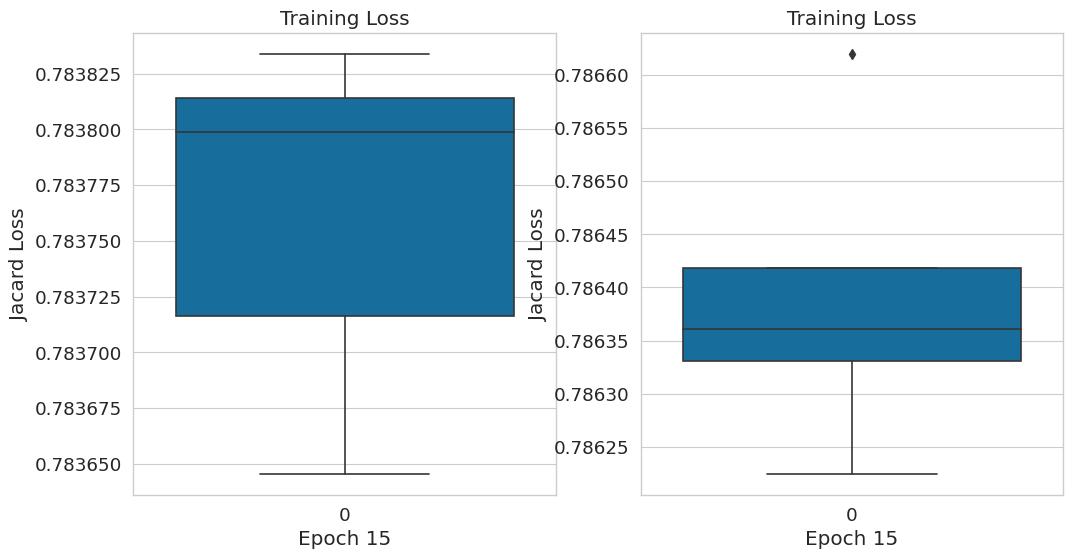

In [73]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
sns.boxplot(data=df["train_losses"].apply(lambda x: x[-1]), ax=ax[0])
sns.boxplot(data=curr_df["train_losses"].apply(lambda x: x[-1]), ax=ax[1])
ax[0].set_title("Training Loss")
ax[1].set_title("Training Loss")
ax[0].set(xlabel="Epoch 15")
ax[1].set(xlabel="Epoch 15")
ax[0].set(ylabel="Jaccard Loss")
ax[1].set(ylabel="Jaccard Loss")
plt.show()

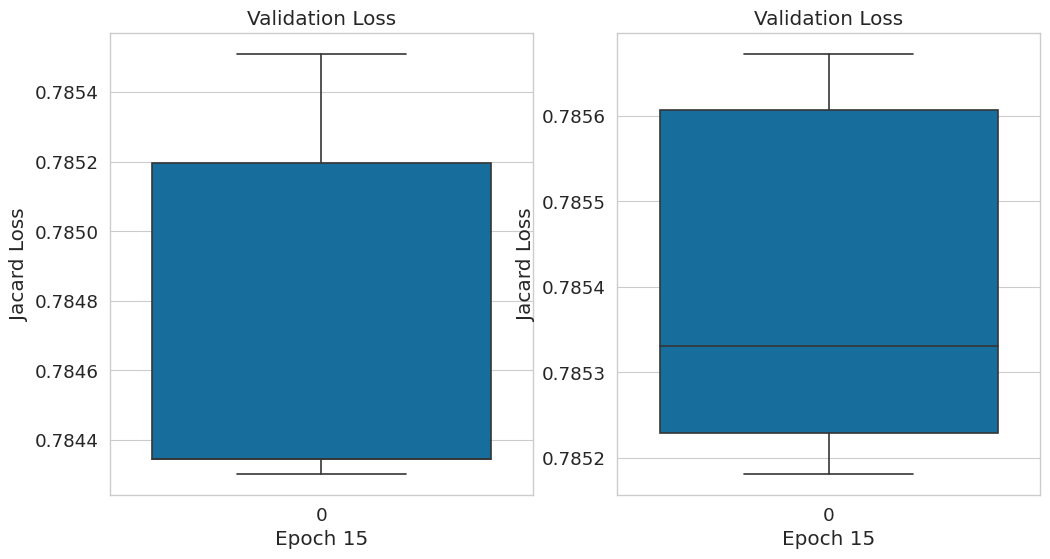

In [74]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
sns.boxplot(data=df["valid_losses"].apply(lambda x: x[-1]), ax=ax[0])
sns.boxplot(data=curr_df["valid_losses"].apply(lambda x: x[-1]), ax=ax[1])
ax[0].set_title("Validation Loss")
ax[1].set_title("Validation Loss")
ax[0].set(xlabel="Epoch 15")
ax[1].set(xlabel="Epoch 15")
ax[0].set(ylabel="Jaccard Loss")
ax[1].set(ylabel="Jaccard Loss")
plt.show()

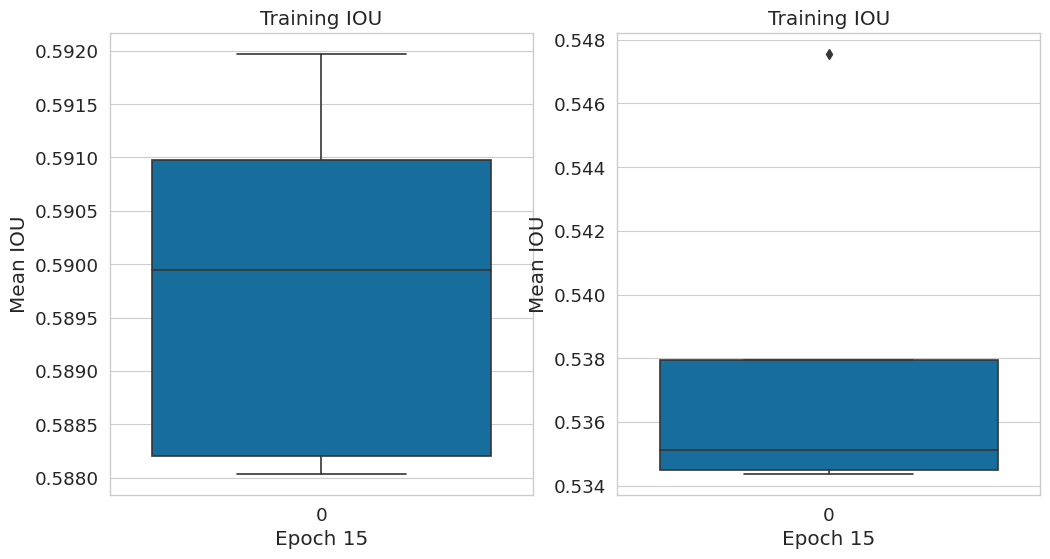

In [75]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
sns.boxplot(data=df["train_ious"].apply(lambda x: x[-1]), ax=ax[0])
sns.boxplot(data=curr_df["train_ious"].apply(lambda x: x[-1]), ax=ax[1])
ax[0].set_title("Training IOU")
ax[1].set_title("Training IOU")
ax[0].set(xlabel="Epoch 15")
ax[1].set(xlabel="Epoch 15")
ax[0].set(ylabel="Mean IOU")
ax[1].set(ylabel="Mean IOU")
plt.show()

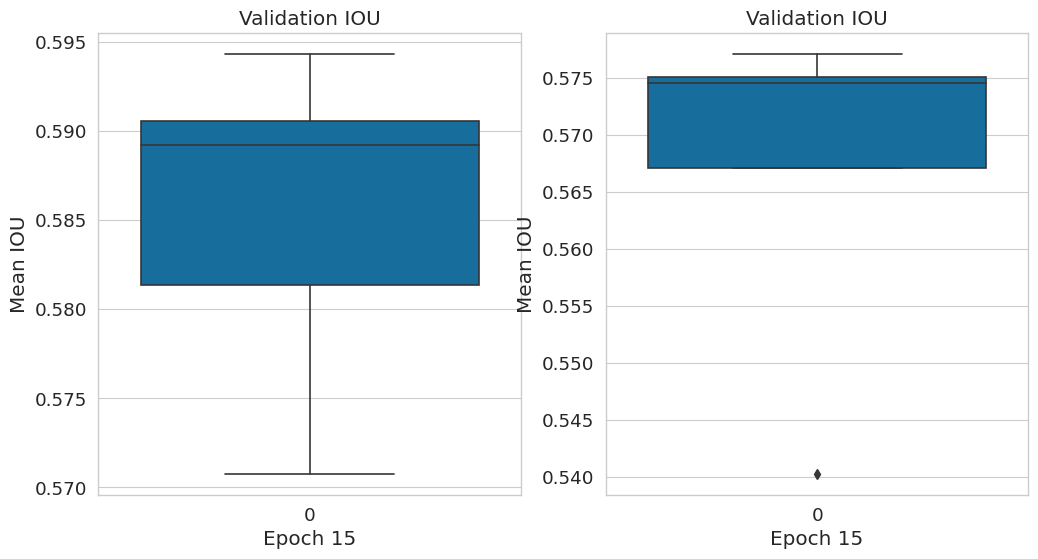

In [76]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
sns.boxplot(data=df["valid_ious"].apply(lambda x: x[-1]), ax=ax[0])
sns.boxplot(data=curr_df["valid_ious"].apply(lambda x: x[-1]), ax=ax[1])
ax[0].set_title("Validation IOU")
ax[1].set_title("Validation IOU")
ax[0].set(xlabel="Epoch 15")
ax[1].set(xlabel="Epoch 15")
ax[0].set(ylabel="Mean IOU")
ax[1].set(ylabel="Mean IOU")
plt.show()

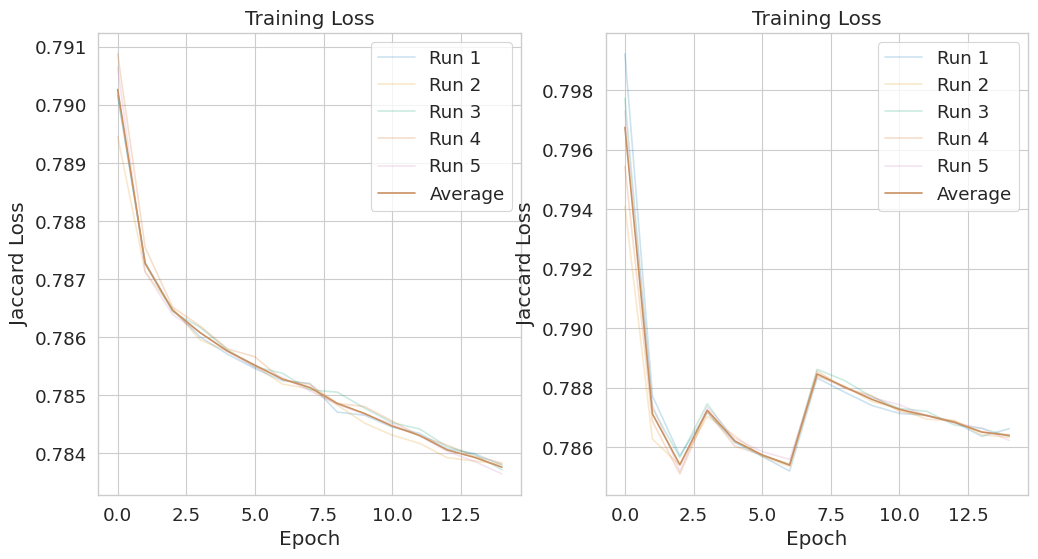

In [77]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
for i in range(5):
    ax[0].plot(df["train_losses"][i], alpha=0.2)
    ax[1].plot(curr_df["train_losses"][i], alpha=0.2)
ax[0].plot(np.mean(df["train_losses"].tolist(), axis=0), alpha=1)
ax[1].plot(np.mean(curr_df["train_losses"].tolist(), axis=0), alpha=1)
ax[0].set_title("Training Loss")
ax[1].set_title("Training Loss")
ax[0].set(xlabel="Epoch")
ax[1].set(xlabel="Epoch")
ax[0].set(ylabel="Jaccard Loss")
ax[1].set(ylabel="Jaccard Loss")
ax[0].legend(["Run 1", "Run 2", "Run 3", "Run 4", "Run 5", "Average"])
ax[1].legend(["Run 1", "Run 2", "Run 3", "Run 4", "Run 5", "Average"])
plt.show()

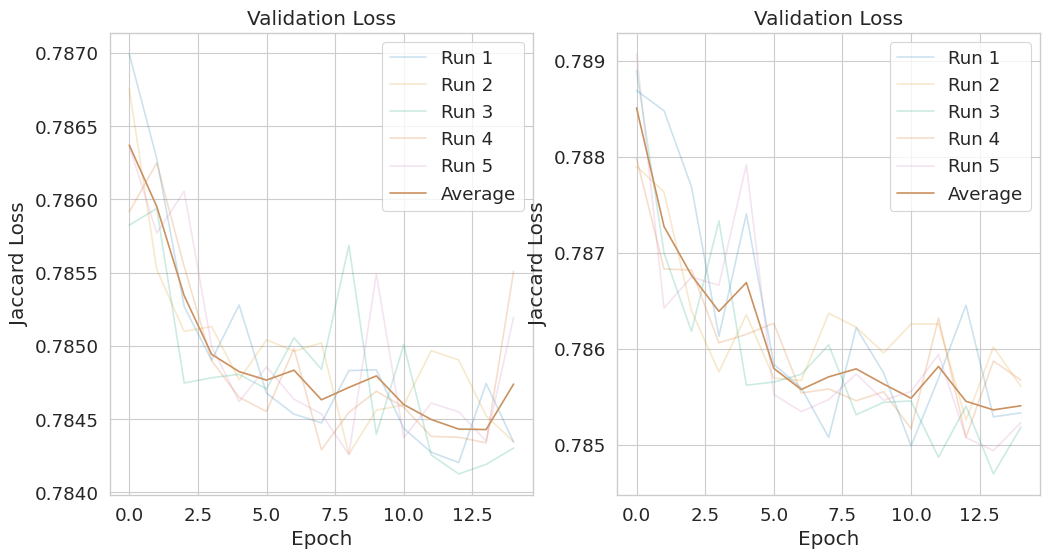

In [78]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
for i in range(5):
    ax[0].plot(df["valid_losses"][i], alpha=0.2)
    ax[1].plot(curr_df["valid_losses"][i], alpha=0.2)
ax[0].plot(np.mean(df["valid_losses"].tolist(), axis=0), alpha=1)
ax[1].plot(np.mean(curr_df["valid_losses"].tolist(), axis=0), alpha=1)
ax[0].set_title("Validation Loss")
ax[1].set_title("Validation Loss")
ax[0].set(xlabel="Epoch")
ax[1].set(xlabel="Epoch")
ax[0].set(ylabel="Jaccard Loss")
ax[1].set(ylabel="Jaccard Loss")
ax[0].legend(["Run 1", "Run 2", "Run 3", "Run 4", "Run 5", "Average"])
ax[1].legend(["Run 1", "Run 2", "Run 3", "Run 4", "Run 5", "Average"])
plt.show()

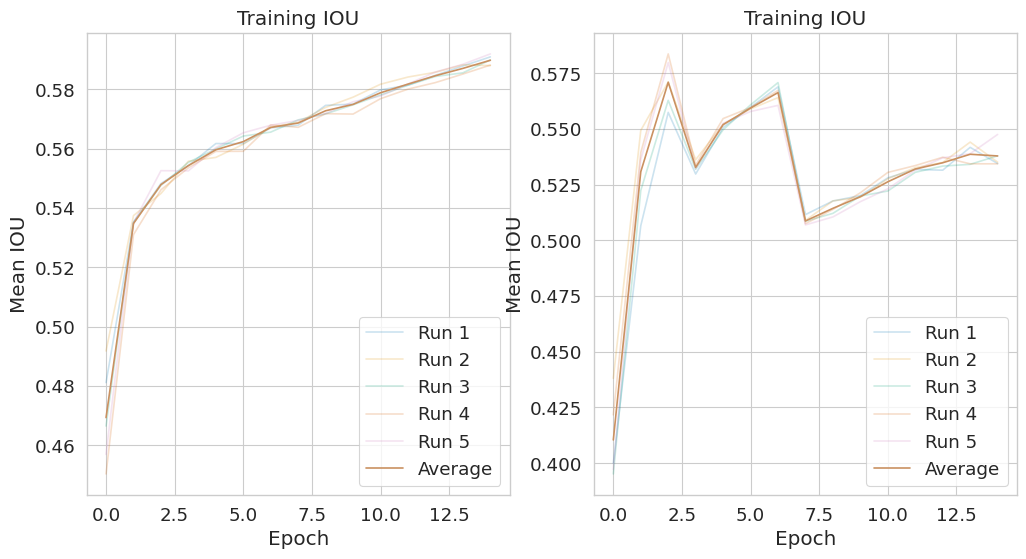

In [79]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
for i in range(5):
    ax[0].plot(df["train_ious"][i], alpha=0.2)
    ax[1].plot(curr_df["train_ious"][i], alpha=0.2)
ax[0].plot(np.mean(df["train_ious"].tolist(), axis=0), alpha=1)
ax[1].plot(np.mean(curr_df["train_ious"].tolist(), axis=0), alpha=1)
ax[0].set_title("Training IOU")
ax[1].set_title("Training IOU")
ax[0].set(xlabel="Epoch")
ax[1].set(xlabel="Epoch")
ax[0].set(ylabel="Mean IOU")
ax[1].set(ylabel="Mean IOU")
ax[0].legend(["Run 1", "Run 2", "Run 3", "Run 4", "Run 5", "Average"])
ax[1].legend(["Run 1", "Run 2", "Run 3", "Run 4", "Run 5", "Average"])
plt.show()


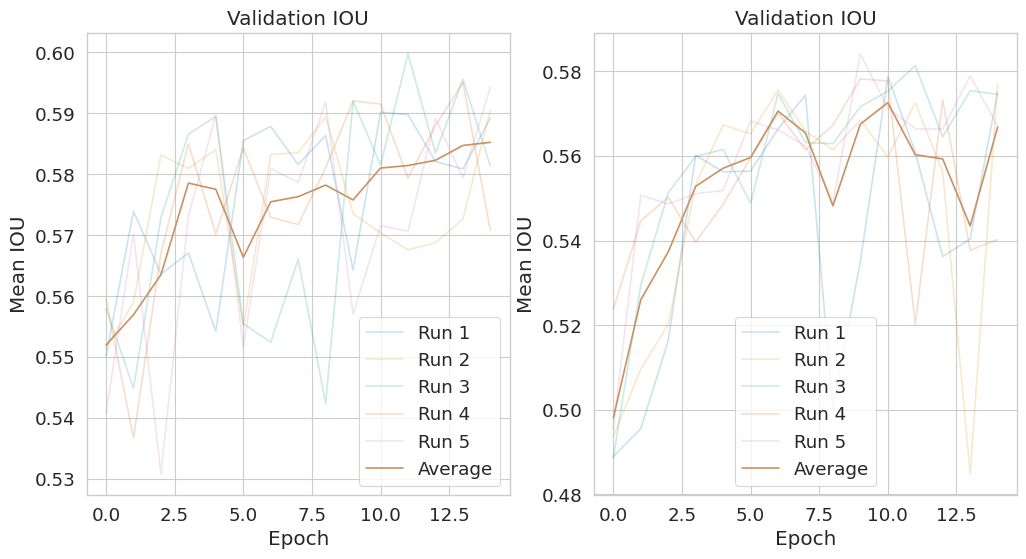

In [80]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
for i in range(5):
    ax[0].plot(df["valid_ious"][i], alpha=0.2)
    ax[1].plot(curr_df["valid_ious"][i], alpha=0.2)
ax[0].plot(np.mean(df["valid_ious"].tolist(), axis=0), alpha=1)
ax[1].plot(np.mean(curr_df["valid_ious"].tolist(), axis=0), alpha=1)
ax[0].set_title("Validation IOU")
ax[1].set_title("Validation IOU")
ax[0].set(xlabel="Epoch")
ax[1].set(xlabel="Epoch")
ax[0].set(ylabel="Mean IOU")
ax[1].set(ylabel="Mean IOU")
ax[0].legend(["Run 1", "Run 2", "Run 3", "Run 4", "Run 5", "Average"])
ax[1].legend(["Run 1", "Run 2", "Run 3", "Run 4", "Run 5", "Average"])
plt.show()
